<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/ModelosRegularizaci%C3%B3n_CrossValidation_Hiperparametrizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
pd.set_option("max_columns", 500)
from sklearn.preprocessing import MinMaxScaler

In [296]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, Lars

In [297]:
boston = load_boston() ## Load and return the boston house-prices dataset (regression).

In [298]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [299]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [300]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [301]:
df = pd.DataFrame(data = boston["data"], columns=boston["feature_names"])

In [302]:
df["target"] = boston["target"]
tgt = "target"

In [303]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [304]:
ls_pred = [x for x in df.columns if x not in [tgt]]

In [305]:
X = df[ls_pred]
y = df[tgt]

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [308]:
#Escalamos variables
Sc = MinMaxScaler()
Sc.fit(X_train)
Xs = Sc.transform(X_train)

Sc_y = MinMaxScaler()
Sc_y.fit(y_train.values.reshape(-1,1))
ys = Sc_y.transform(y_train.values.reshape(-1,1))

## **LASSO**

# Cross Validation

### No escalado

In [309]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [310]:
model_lasso = Lasso()
ls_medias = cross_val_score(estimator=model_lasso, X=X_train, y = y_train, cv = 4, n_jobs=-1, scoring="r2")
ls_medias

array([0.65344408, 0.58371562, 0.63285178, 0.65528127])

In [311]:
np.mean(ls_medias), np.std(ls_medias)

(0.6313231870575887, 0.0288623504702011)

### Escalado

In [312]:
ls_medias = cross_val_score(estimator=model_lasso, X=Xs, y = ys, cv = 4, n_jobs=-1, scoring="r2")
ls_medias

array([-0.01658557, -0.02800646, -0.00223432, -0.00011894])

In [313]:
np.mean(ls_medias), np.std(ls_medias)

(-0.011736324224943917, 0.011330096328537872)

# GridSearch

In [314]:
model_lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [315]:
param_grid = {
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "tol": [0.00001, 0.0000001, 0.01],
    "selection": ['cyclic', 'random']
}

In [316]:
param_grid

{'alpha': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  0.0,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9],
 'selection': ['cyclic', 'random'],
 'tol': [1e-05, 1e-07, 0.01]}

In [317]:
np.prod(list(map(len, param_grid.values())))

654

### Sin Escalamiento

In [318]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [319]:
clf = GridSearchCV(model_lasso, param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2", verbose=5)
clf.fit(X_train, y_train)
print("Best score: " + str(clf.best_score_))

Fitting 4 folds for each of 654 candidates, totalling 2616 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    5.1s


Best score: 0.664593940719352


[Parallel(n_jobs=-1)]: Done 2613 out of 2616 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2616 out of 2616 | elapsed:    7.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3945.9308963590033, tolerance: 0.002849536759887006
  positive)


In [320]:
# Guardamos los resultados
summary = pd.DataFrame(clf.cv_results_)

In [321]:
summary.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_selection,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003807,0.001250,0.001543,0.000255,1,cyclic,1e-05,"{'alpha': 1, 'selection': 'cyclic', 'tol': 1e-05}",0.653458,0.583728,0.632841,0.655293,0.631330,0.028862,65
1,0.003125,0.000157,0.001939,0.000474,1,cyclic,1e-07,"{'alpha': 1, 'selection': 'cyclic', 'tol': 1e-07}",0.653458,0.583730,0.632840,0.655294,0.631330,0.028862,63
2,0.005120,0.002905,0.001746,0.000237,1,cyclic,0.01,"{'alpha': 1, 'selection': 'cyclic', 'tol': 0.01}",0.653506,0.583229,0.633749,0.654530,0.631254,0.028938,66


In [322]:
summary.sort_values(by = "rank_test_score").tail(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_selection,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
588,0.002465,0.000082,0.001429,0.000012,99,cyclic,1e-05,"{'alpha': 99, 'selection': 'cyclic', 'tol': 1e...",0.275119,0.118740,0.250817,0.194872,0.209887,0.060132,652
589,0.002489,0.000064,0.001473,0.000063,99,cyclic,1e-07,"{'alpha': 99, 'selection': 'cyclic', 'tol': 1e...",0.275119,0.118740,0.250817,0.194872,0.209887,0.060132,653
591,0.003724,0.001793,0.003424,0.003078,99,random,1e-05,"{'alpha': 99, 'selection': 'random', 'tol': 1e...",0.275112,0.118741,0.250816,0.194872,0.209885,0.060130,654


In [323]:
dc_scores={}
dc_scores[str(model_lasso).split("(")[0]] = {"model": clf.best_estimator_, "score": clf.best_score_}
dc_scores

{'Lasso': {'model': Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='random', tol=1e-07, warm_start=False),
  'score': 0.664593940719352}}

### Escalado

In [324]:
clf = GridSearchCV(model_lasso, param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2", verbose=5)
clf.fit(Xs, ys)
print("Best score: " + str(clf.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 654 candidates, totalling 2616 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s


Best score: 0.664593940719352


[Parallel(n_jobs=-1)]: Done 2519 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2613 out of 2616 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2616 out of 2616 | elapsed:    3.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9486078500538253, tolerance: 0.00014071786468577806
  positive)


In [325]:
dc_scores[str(model_lasso).split("(")[0]] = {"model": clf.best_estimator_, "score": clf.best_score_}
dc_scores

{'Lasso': {'model': Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='random', tol=1e-05, warm_start=False),
  'score': 0.664593940719352}}

## **RIDGE**

In [326]:
model_ridge = Ridge()

### Cross Validation Sin escalar

In [328]:
model_ridge.fit(X_train, y_train)
ls_medias_ridge = cross_val_score(estimator=model_ridge, X=X_train, y = y_train, cv = 4, n_jobs=-1, scoring="r2")
np.mean(ls_medias_ridge), np.std(ls_medias_ridge)

(0.6601059213624934, 0.09325133602833377)

### Cross Validation Escalando

In [329]:
model_ridge.fit(Xs, ys)
ls_medias_ridge = cross_val_score(estimator=model_ridge, X=Xs, y = ys, cv = 4, n_jobs=-1, scoring="r2")
np.mean(ls_medias_ridge), np.std(ls_medias_ridge)

(0.6721569001047378, 0.06566740450977218)

#Grid Search Sin Escalado

In [330]:
model_ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [331]:
param_grid = {
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "tol": [0.00001, 0.0000001, 0.01],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [332]:
np.prod(list(map(len, param_grid.values())))

2289

In [333]:
clf_ridge = GridSearchCV(model_ridge, param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2")
clf_ridge.fit(X_train, y_train)
print("Best score: " + str(clf_ridge.best_score_))

Best score: 0.6671484717862689


In [334]:
summary_ridge = pd.DataFrame(clf_ridge.cv_results_)
summary_ridge.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002994,0.000616,0.001793,0.000601,1,auto,1e-05,"{'alpha': 1, 'solver': 'auto', 'tol': 1e-05}",0.73418,0.699342,0.500162,0.706739,0.660106,0.093251,1345
1,0.002872,0.000140,0.003281,0.002909,1,auto,1e-07,"{'alpha': 1, 'solver': 'auto', 'tol': 1e-07}",0.73418,0.699342,0.500162,0.706739,0.660106,0.093251,1345
2,0.002816,0.000450,0.001624,0.000323,1,auto,0.01,"{'alpha': 1, 'solver': 'auto', 'tol': 0.01}",0.73418,0.699342,0.500162,0.706739,0.660106,0.093251,1345


In [335]:
summary_ridge.sort_values(by = "rank_test_score").tail(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1700,0.006997,0.000130,0.001643,0.000059,81,saga,0.01,"{'alpha': 81, 'solver': 'saga', 'tol': 0.01}",0.605171,0.469566,0.552757,0.559934,0.546857,0.048939,2287
1784,0.006950,0.000383,0.001689,0.000035,85,saga,0.01,"{'alpha': 85, 'solver': 'saga', 'tol': 0.01}",0.605440,0.468890,0.552590,0.560316,0.546809,0.049307,2288
1889,0.006469,0.000269,0.001444,0.000045,90,saga,0.01,"{'alpha': 90, 'solver': 'saga', 'tol': 0.01}",0.605802,0.468195,0.552571,0.560213,0.546695,0.049682,2289


In [336]:
dc_scores[str(model_ridge).split("(")[0]] = {"model": clf_ridge.best_estimator_, "score": clf_ridge.best_score_}
dc_scores

{'Lasso': {'model': Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='random', tol=1e-05, warm_start=False),
  'score': 0.664593940719352},
 'Ridge': {'model': Ridge(alpha=33, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
        random_state=None, solver='lsqr', tol=1e-05),
  'score': 0.6671484717862689}}

## Grid Search Escalado

In [337]:
clf_ridge = GridSearchCV(model_ridge, param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2")
clf_ridge.fit(Xs, ys)
print("Best score: " + str(clf_ridge.best_score_))

Best score: 0.6732500110460955


In [338]:
dc_scores[str(model_ridge).split("(")[0]] = {"model": clf_ridge.best_estimator_, "score": clf_ridge.best_score_}
dc_scores

{'Lasso': {'model': Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='random', tol=1e-05, warm_start=False),
  'score': 0.664593940719352},
 'Ridge': {'model': Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='saga', tol=0.01),
  'score': 0.6732500110460955}}

## **Elastic Net**

In [339]:
model_elastic = ElasticNet()

### Cross Validation Sin escalar

In [340]:
model_elastic.fit(X_train, y_train)
ls_medias_elastic = cross_val_score(estimator=model_elastic, X=X_train, y = y_train, cv = 4, n_jobs=-1, scoring="r2")
np.mean(ls_medias_elastic), np.std(ls_medias_elastic)

(0.6393109136793309, 0.02204401594848169)

### Cross Validation Escalado

In [341]:
model_elastic.fit(Xs, ys)
ls_medias_elastic = cross_val_score(estimator=model_elastic, X=Xs, y = ys, cv = 4, n_jobs=-1, scoring="r2")
np.mean(ls_medias_elastic), np.std(ls_medias_elastic)

(-0.011736324224943917, 0.011330096328537872)

### Grid Search Sin escalar

In [342]:
model_elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [343]:
param_grid = {
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "l1_ratio": [x/1000 for x in range(1, 100)] + [y/10 for y in range(10)],
    "selection": ["cyclic", "random"]
}

In [344]:
np.prod(list(map(len, param_grid.values())))

23762

In [345]:
clf_elastic = GridSearchCV(model_elastic, param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2", verbose=5,)
clf_elastic.fit(X_train, y_train)
print("Best score: " + str(clf_elastic.best_score_))

Fitting 4 folds for each of 23762 candidates, totalling 95048 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 4572 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 8604 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 13788 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 20124 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 27612 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 36252 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 46044 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 56988 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 69084 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 82332 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 95048 out of 95048 | elapsed:  4.7min finished


Best score: 0.6669510591821224


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4355.22653598629, tolerance: 2.8495367598870063
  positive)


In [346]:
summary_elastic = pd.DataFrame(clf_elastic.cv_results_)

In [347]:
summary_elastic.sort_values(by = "rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_selection,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
21999,0.013210,0.005038,0.001735,0.000041,0.1,0,random,"{'alpha': 0.1, 'l1_ratio': 0.0, 'selection': '...",0.713089,0.675466,0.588167,0.691082,0.666951,0.047409,1
21998,0.010887,0.003123,0.001794,0.000091,0.1,0,cyclic,"{'alpha': 0.1, 'l1_ratio': 0.0, 'selection': '...",0.713089,0.675466,0.588167,0.691082,0.666951,0.047409,2
21800,0.002991,0.000066,0.001564,0.000151,0.1,0.001,cyclic,"{'alpha': 0.1, 'l1_ratio': 0.001, 'selection':...",0.713095,0.675471,0.588135,0.691083,0.666946,0.047424,3


In [348]:
dc_scores[str(model_elastic).split("(")[0]] = {"model": clf_elastic.best_estimator_, "score": clf_elastic.best_score_}

In [349]:
dc_scores

{'ElasticNet': {'model': ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.0,
             max_iter=1000, normalize=False, positive=False, precompute=False,
             random_state=None, selection='random', tol=0.0001, warm_start=False),
  'score': 0.6669510591821224},
 'Lasso': {'model': Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='random', tol=1e-05, warm_start=False),
  'score': 0.664593940719352},
 'Ridge': {'model': Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='saga', tol=0.01),
  'score': 0.6732500110460955}}

### Grid Search Escalado

In [350]:
clf_elastic = GridSearchCV(model_elastic, param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2", verbose=5,)
clf_elastic.fit(Xs, ys)
print("Best score: " + str(clf_elastic.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 23762 candidates, totalling 95048 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 5628 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 17148 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 33276 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 54012 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 79356 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 95045 out of 95048 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 95048 out of 95048 | elapsed:  2.2min finished


Best score: 0.6645939407193521


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9486078500538282, tolerance: 0.0014071786468577807
  positive)


In [351]:
dc_scores[str(model_elastic).split("(")[0]] = {"model": clf_elastic.best_estimator_, "score": clf_elastic.best_score_}
dc_scores

{'ElasticNet': {'model': ElasticNet(alpha=0.0, copy_X=True, fit_intercept=True, l1_ratio=0.052,
             max_iter=1000, normalize=False, positive=False, precompute=False,
             random_state=None, selection='random', tol=0.0001, warm_start=False),
  'score': 0.6645939407193521},
 'Lasso': {'model': Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='random', tol=1e-05, warm_start=False),
  'score': 0.664593940719352},
 'Ridge': {'model': Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='saga', tol=0.01),
  'score': 0.6732500110460955}}

## **Realizamos una busqueda aleatoria de gradilla para ver si conseguimos mejores resultados**

## Sin esacalar

In [352]:
clf = RandomizedSearchCV(n_iter=2000, estimator=model_elastic, param_distributions=param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2", verbose=5)
clf.fit(X_train, y_train)
print("Best score: " + str(clf.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 2000 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 4540 tasks      | elapsed:   13.6s


Best score: 0.6669415289197003


[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:   23.6s finished


## Escalado

In [353]:
clf = RandomizedSearchCV(n_iter=2000, estimator=model_elastic, param_distributions=param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2", verbose=5)
clf.fit(Xs, ys)
print("Best score: " + str(clf.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s


Fitting 4 folds for each of 2000 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Done 3068 tasks      | elapsed:    4.7s


Best score: 0.664593940719352


[Parallel(n_jobs=-1)]: Done 7974 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:   11.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9486078500538349, tolerance: 0.0014071786468577807
  positive)


# **Guardar el Modelo**

In [136]:
dc_scores

{'ElasticNet': {'model': ElasticNet(alpha=0.0, copy_X=True, fit_intercept=True, l1_ratio=0.058,
             max_iter=1000, normalize=False, positive=False, precompute=False,
             random_state=None, selection='random', tol=0.0001, warm_start=False),
  'score': 0.695576206196457},
 'Lasso': {'model': Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='random', tol=0.01, warm_start=False),
  'score': 0.6955762061964569},
 'Ridge': {'model': Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='sag', tol=0.01),
  'score': 0.6989809156847101}}

In [137]:
#Mejor modelo
dc_scores['Ridge']['model']

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sag', tol=0.01)

In [138]:
#Lo guardamos en formato pickle
pd.to_pickle(dc_scores['Ridge']['model'],'model_ridge_housing.pkl')

In [139]:
#Leemos el modelo guardado
modelo_ganador=pd.read_pickle('model_ridge_housing.pkl')

In [140]:
modelo_ganador

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sag', tol=0.01)

In [141]:
#Predecimos en el test
#Regresamos a la escala original porque el target estaba escalado en el modelo ganador y escalamos el x_test porque también estaba escalado en el entrenamiento
predicciones=Sc_y.inverse_transform(modelo_ganador.predict(Sc.transform(X_test)))
predicciones

array([[13.35258618],
       [22.02750404],
       [24.93182569],
       [17.49652493],
       [37.97115343],
       [20.35751324],
       [25.65239635],
       [14.15498119],
       [23.62587806],
       [14.88056055],
       [21.13710803],
       [31.87000284],
       [28.78711116],
       [ 5.55431079],
       [20.65365966],
       [27.15903204],
       [30.67525065],
       [25.59185266],
       [ 4.91598776],
       [18.18480271],
       [23.21906599],
       [16.59956443],
       [35.10515738],
       [16.28352413],
       [23.7391352 ],
       [21.02497794],
       [19.30664542],
       [23.19654541],
       [21.0062187 ],
       [32.9749458 ],
       [33.49402159],
       [24.48851882],
       [12.82990108],
       [21.40575453],
       [15.7834206 ],
       [32.5461329 ],
       [25.26610182],
       [29.68867027],
       [30.69825721],
       [20.86687419],
       [31.51640916],
       [35.8878449 ],
       [18.57310627],
       [ 2.87665831],
       [15.67585391],
       [23

In [142]:
#Veamos el preformance
#Parece que funciona mejor con el set de prueba
from sklearn.metrics import r2_score
r2_score(y_pred=predicciones, y_true=y_test)

0.7640231392564862

In [144]:
#Predecimos en el target escalado
Xt=Sc.transform(X_test)
modelo_ganador.score(Xt, Sc_y.transform(y_test.values.reshape(-1,1)))

0.7640231392564861

# **Transformación de variables**

In [216]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [217]:
df['targe_log']=np.log(df['target'])

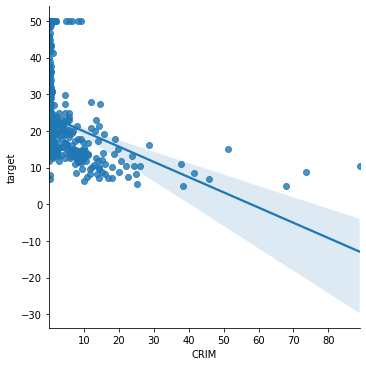

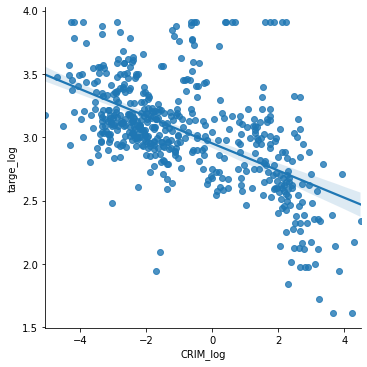

In [218]:
import seaborn as sns
sns.lmplot(x='CRIM',y='target',data=df,order=1)
df['CRIM_log']=np.log(df['CRIM'])
sns.lmplot(x='CRIM_log',y='targe_log',data=df,order=1)

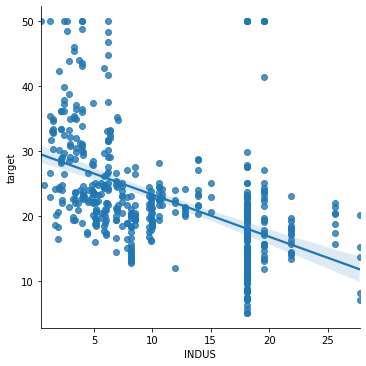

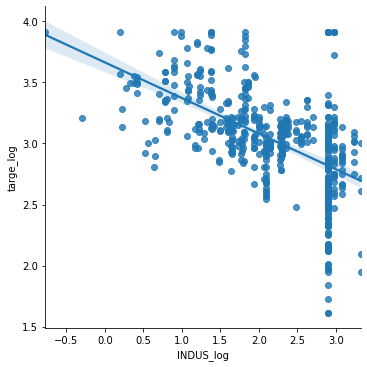

In [219]:
import seaborn as sns
sns.lmplot(x='INDUS',y='target',data=df,order=1)
df['INDUS_log']=np.log(df['INDUS'])
sns.lmplot(x='INDUS_log',y='targe_log',data=df,order=1)

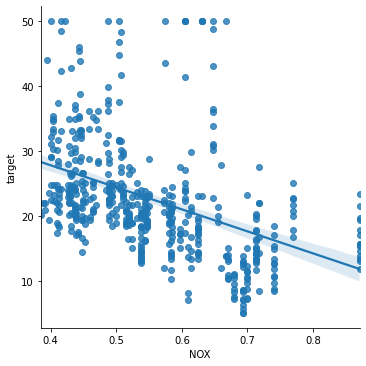

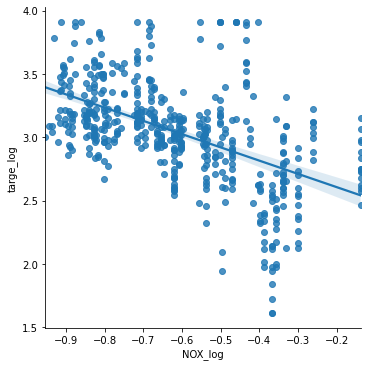

In [220]:
import seaborn as sns
sns.lmplot(x='NOX',y='target',data=df,order=1)
df['NOX_log']=np.log(df['NOX'])
sns.lmplot(x='NOX_log',y='targe_log',data=df,order=1)

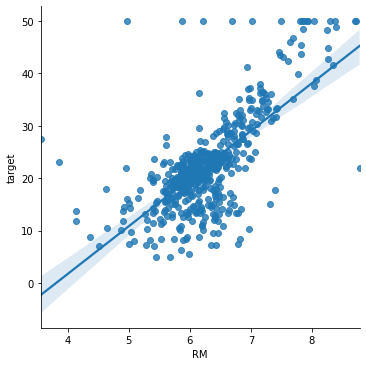

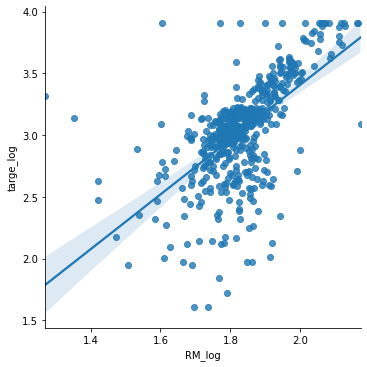

In [221]:
import seaborn as sns
sns.lmplot(x='RM',y='target',data=df,order=1)
df['RM_log']=np.log(df['RM'])
sns.lmplot(x='RM_log',y='targe_log',data=df,order=1)

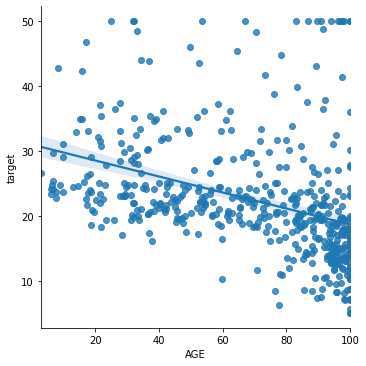

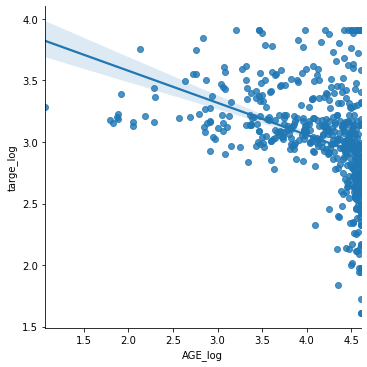

In [222]:
import seaborn as sns
sns.lmplot(x='AGE',y='target',data=df,order=1)
df['AGE_log']=np.log(df['AGE'])
sns.lmplot(x='AGE_log',y='targe_log',data=df,order=1)

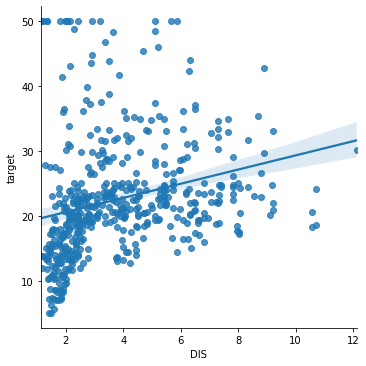

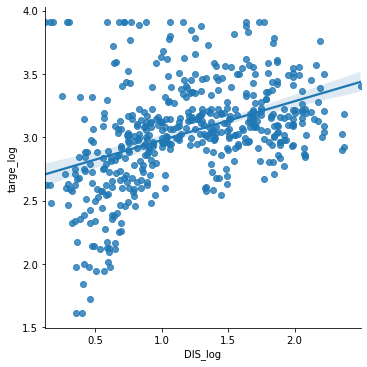

In [224]:
import seaborn as sns
sns.lmplot(x='DIS',y='target',data=df,order=1)
df['DIS_log']=np.log(df['DIS'])
sns.lmplot(x='DIS_log',y='targe_log',data=df,order=1)

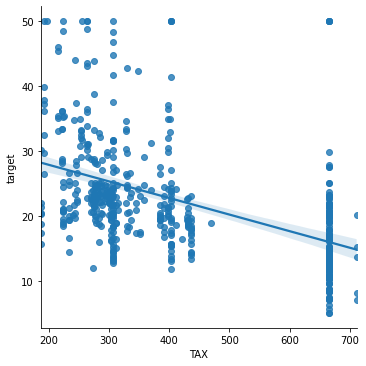

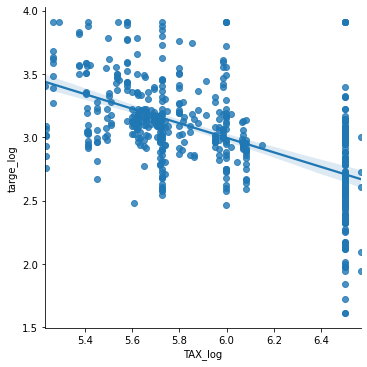

In [225]:
import seaborn as sns
sns.lmplot(x='TAX',y='target',data=df,order=1)
df['TAX_log']=np.log(df['TAX'])
sns.lmplot(x='TAX_log',y='targe_log',data=df,order=1)

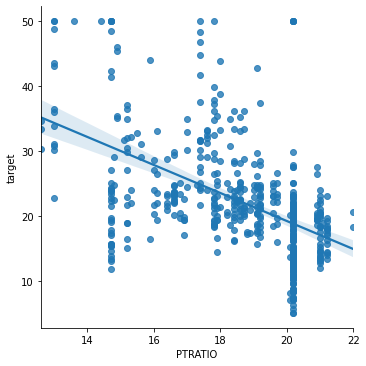

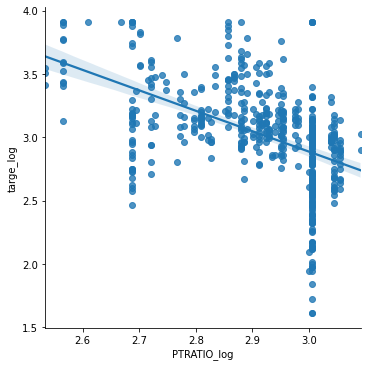

In [226]:
import seaborn as sns
sns.lmplot(x='PTRATIO',y='target',data=df,order=1)
df['PTRATIO_log']=np.log(df['PTRATIO'])
sns.lmplot(x='PTRATIO_log',y='targe_log',data=df,order=1)

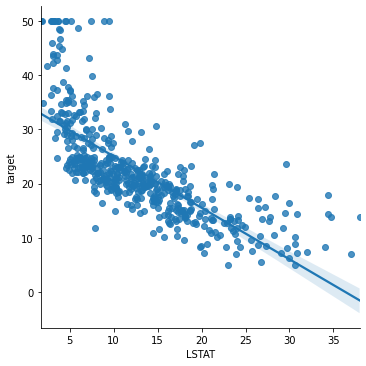

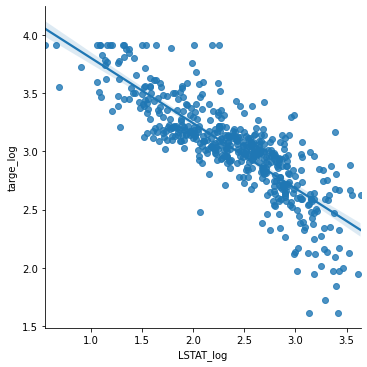

In [228]:
import seaborn as sns
sns.lmplot(x='LSTAT',y='target',data=df,order=1)
df['LSTAT_log']=np.log(df['LSTAT'])
sns.lmplot(x='LSTAT_log',y='targe_log',data=df,order=1)

In [231]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target', 'targe_log', 'CRIM_log', 'INDUS_log',
       'NOX_log', 'RM_log', 'AGE_log', 'DIS_log', 'TAX_log', 'PTRATIO_log',
       'B_log', 'LSTAT_log'],
      dtype='object')

In [230]:
list(df.filter(like="_log").columns)

['targe_log',
 'CRIM_log',
 'INDUS_log',
 'NOX_log',
 'RM_log',
 'AGE_log',
 'DIS_log',
 'TAX_log',
 'PTRATIO_log',
 'B_log',
 'LSTAT_log']

In [232]:
X = df[[
 'CRIM_log',
 'INDUS_log',
 'NOX_log',
 'RM_log',
 'AGE_log',
 'DIS_log',
 'TAX_log',
 'PTRATIO_log',
 'LSTAT_log']]
y = df['targe_log']

In [264]:
#Partimos set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 9), (152, 9), (354,), (152,))

### Cross Validation

In [277]:
X_train.columns

Index(['CRIM_log', 'INDUS_log', 'NOX_log', 'RM_log', 'AGE_log', 'DIS_log',
       'TAX_log', 'PTRATIO_log', 'LSTAT_log'],
      dtype='object')

In [278]:
model_ridge = Ridge()
#model_ridge.fit(X_train, y_train)
ls_medias_ridge = cross_val_score(estimator=model_ridge, X=X_train, y = y_train, cv = 4, n_jobs=-1, scoring="r2")
np.mean(ls_medias_ridge), np.std(ls_medias_ridge)

(0.7484719379361437, 0.027294831508708338)

# Grid Search

In [272]:
param_grid = {
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "tol": [0.00001, 0.0000001, 0.01],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [273]:
clf_ridge = GridSearchCV(model_ridge, param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2")
clf_ridge.fit(X_train, y_train)
print("Best score: " + str(clf_ridge.best_score_))

Best score: 0.7506401027435479


In [279]:
clf_ridge.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sparse_cg', tol=1e-05)

In [280]:
clf_ridge.best_estimator_.coef_

array([-0.02251378,  0.0327309 , -0.24094521,  0.58419966,  0.04568009,
       -0.12740744, -0.14280738, -0.42947414, -0.40893791])

## Veamos como funciona el test

In [292]:
#Veamos el performance sin regresar variables del test
clf_ridge.best_estimator_.score(X_test, y_test)

0.6690692143553488

In [293]:
#Train con escala regresada
predicciones=np.exp(clf_ridge.best_estimator_.predict(X_train))
#Predecimos regresando las variables
r2_score(y_pred=predicciones, y_true=np.exp(y_train))

0.7807212141044103

In [294]:
#Test
predicciones=np.exp(clf_ridge.best_estimator_.predict(X_test))
#Predecimos regresando las variables
r2_score(y_pred=predicciones, y_true=np.exp(y_test))

0.7074935997085566